# Лабораторная работа 4. Построение бинарного дерева поиска

Вычислительная практика 2. ММФ. 5 группа
Бельская Екатерина. апрель 2020

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import random as rnd

## Описание бинарного дерева поиска

Бинарное дерево поиска будем описывать с помощью списка. Каждая вершина дерева описывается списком из трех элементов

* 1-ый элемент списка для вершины содержит элемент числовой последовательности source_data;
* 2-ой элемент списка для вершины содержит левое поддерево текущей вершины в виде вложенного списка или None, если левое поддерево отсутствует;
* 3-ий элемент списка для вершина содержит правое поддерево текущей вершины в виде вложенного списка или None, если правое поддерево отсутствует.

Отметим, что при такой структуре описания бинарное дерево поиска является описанием корневой вершины дерева.

## Пример пошагового построения бинарного дерева поиска

Задана последовательность чисел в виде списка, которую нужно представить бинарным деревом поиска

In [4]:
source_data = [5, 1, 10, 3, 4]

Создаем дерево в виде одной вершины, которая содержит элемент source_data[0]

In [5]:
tree = [source_data[0], None, None]
tree

[5, None, None]

Создаем новую вершину с элементом source_data[1] и располагаем созданную вершину как левое поддерево корневой вершины, так как source_data[1]<source_data[0]

In [6]:
node = [source_data[1], None, None]
tree[1] = node
tree

[5, [1, None, None], None]

Создаем новую вершину с элементом source_data[2] и располагаем созданную вершину как правое поддерево корневой вершины, так как source_data[2]>source_data[0]

In [7]:
node = [source_data[2], None ,None]
tree[2] = node
tree

[5, [1, None, None], [10, None, None]]

Создаем новую вершину с элементом source_data[3] и располагаем созданную вершину на свободное место, начиная сравнение source_data[3] со значением корневой вершины

In [8]:
node = [source_data[3], None, None]
tree[1][2] = node
tree

[5, [1, None, [3, None, None]], [10, None, None]]

Добавляем новую вершину с элементом source_data[4]

In [9]:
node = [source_data[4], None, None]
tree[1][2][2] = node
tree


[5, [1, None, [3, None, [4, None, None]]], [10, None, None]]

### Постановка задачи

Напишите пользовательскую функцию create_tree(source_data), которая строит бинарное дерево поиска по заданной числовой последовательности source_data.

Элементы числовой последовательности source_data необходимо обходить последовательно и добавлять в бинарное дерево поиска в виде новой вершины. Изначально числовая последовательность source_data записана в тексовый файл.

### Реализация задачи

#### Этап 1. Чтение данных из файла

Функция **open** создает объект файла, который обеспечивает связь с файлом, размещенным на компьютере. После вызова функции open можно выполнить операции чтения и записи во внешний файл, используя методы полученного объекта.

In [10]:
f1 = open("VP2_LR4_data_column.txt") # файл открыт только для чтения
f2 = open("VP2_LR4_data_rows.txt")
type(f1)

_io.TextIOWrapper

Объект файла имеет собственный итератор, который позволяет автоматически читать информацию из файла строку за строкой в конструкциях цикла for или в генераторах списков. Операция чтения возвращает текст в виде строки (str), поэтому необходимо выполнять преобразование в другие типы данных, например float.

Чтение из файла (числа в файле записаны в один столбец)

In [11]:
source_data1 = [float(x) for x in f1]

Чтение из файла (числа в файле записаны в строки и разделены пробелами)

In [12]:
# выражение выполняется слева направо
source_data2 = [float(x) for row in f2 for x in row.split(' ')]

Метод **split** для строк разбивает строку на части по пробелам, которые играют роль символов-разделителей. В результате получается список строк, где каждая строка представляет отдельное число.

In [13]:
source_data1, source_data2

([5.0, 1.0, 10.0, 3.0, 4.0], [5.0, 1.0, 10.0, 3.0, 4.0])

Вызовом метода **close** завершается связь с внешним файлом

In [14]:
f1.close(); f2.close()

Простым способом чтения текстового файла с числовыми данными, записанными в табличном формате по столбцам (в каждой строке одинаковое количество чисел, разделенных пробелами), в массив является использование функции **loadtxt** из библиотеки **numpy**

In [15]:
source_data3 = np.loadtxt("VP2_LR4_data_column.txt") # числа в файле записаны в один столбец
source_data3

array([ 5.,  1., 10.,  3.,  4.])

#### Этап 2. Визуализация данных

Построим график числовых данных с помощью функции **stem**

In [43]:
source_data = source_data3

In [44]:
source_data

array([ 5.,  1., 10.,  3.,  4.])

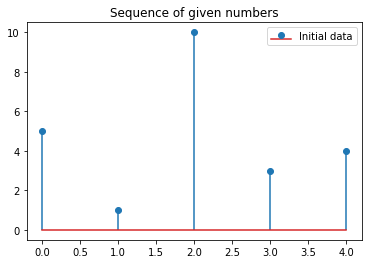

In [45]:
plt.stem(source_data, use_line_collection=True)
plt.title('Sequence of given numbers')
plt.legend(['Initial data'])

#### Этап 3. Реализация функции create_tree(source_data) для создания бинарного дерева поиска

Пример возможной реализации пользовательской функции create_tree(source_data)

In [46]:
def create_node(node):
    """ создаёт вершину дерева и 2 ветки 
    
        Arguments:
        node -- число
                        
        Returns: соответсвующий список    
    """
    return [node, None, None]

In [47]:
def insert_node(tree, element):
    """ рекурсивная вставка вершины в дерево 
    
        Arguments:
        tree -- старое дерево
        element -- элемент для вставки
                        
        Returns: новое дерево с вставленной вершиной   
    """
    element = create_node(element) #создание будущей вершины
    if tree[0] == None: # дерево ещё пустое
        return element
    # проверки на принадлежность к веткам
    if tree[0] > element[0]:
        if tree[1] is None:
            tree[1] = element
        else:
            tree[1] = insert_node(tree[1], element[0])
    else:
        if tree[2] is None:
            tree[2] = element
        else:
            tree[2] = insert_node(tree[2], element[0])
    return tree

In [48]:
def create_tree(source_data):
    """ создает бинарное дерева поиска по входной числовой последовательности в виде вложенного списка и возвращает дерево
    
        Arguments:
        source_data -- список или массив чисел
                        
        Returns: вложенный список, представляющий бинарное дерево поиска для заданной последовательности  
    """
    tree = [None]
    for element in source_data:
        tree = insert_node(tree, element)
    return tree

In [49]:
create_tree(source_data)

[5.0, [1.0, None, [3.0, None, [4.0, None, None]]], [10.0, None, None]]

#### Этап 4. Создание пользовательской функции insert_tree(tree, new_element) для вставки элемента new_element в бинарное дерево поиска tree

Воможен следующий **рекурсивный** алгоритм вставки вершины в дерево:

* Необходимо найти родительскую вершину для new_element, т.е. такую вершину, которая имеет свободную связь для подцепления новой вершины без нарушения структуры дерева. Поиск родительской вершины можно реализовать *рекурсивно*, вызывая функцию insert_node(sub_tree, new_element) для поддерева sub_tree дерева tree внутри функции insert_node(tree, new_element) при движении по дереву сверху вниз.
* После того, как родительская вершина найдена:
    * если new_element < parent_element, то необходимо заменить None для левого поддерева родительской вершины на список [new_element, None, None];
    * если new_element <= parent_element, то необходимо заменить None для правого поддерева родительской вершины на список [new_element, None, None].

#### Этап 5. Создание бинарного дерева поиска

In [50]:
tree = create_tree(source_data)
tree

[5.0, [1.0, None, [3.0, None, [4.0, None, None]]], [10.0, None, None]]

#### Этап 6* (необязательное задание). Удаление вершины из дерева

In [51]:
def search_for_node(subtree):
    """ находит минимальный элемент из нужного поддерева, который будет использоваться для замены
    
        Arguments:
        subtree -- правое поддерево
                        
        Returns: соответствующий список
    """
    el = subtree
    while(el[1] is not None): 
        el = el[1]
    return el

In [52]:
def delete_element(tree, element):
    """ удаление элемента в исходном дереве
    
        Arguments:
        tree -- исходное дерево
        element -- элемент для удаления
                        
        Returns: измененное дерево (без элемента, необходимого для удаления)
    """
    if tree is None:
        return tree
    # нахождение нужного узла
    if element < tree[0]:
        tree[1] = delete_element(tree[1], element)
    elif element > tree[0]:
        tree [2] = delete_element(tree[2], element)
    # когда узел был найден, для удаления необходимо рассмотреть следующие случаи
    else:
        # у удаляемого узла нет ни правого, ни левого ребенка.
        if tree[1] is None and tree[2] is None:
            tree = None
            return tree
        # у удаляемого узла нет левого ребенка
        if tree[1] is None:
            sub = tree[2]
            tree = None
            return sub
        # у удаляемого узла нет правого ребенка
        if tree[2] is None:
            sub = tree[1]
            tree = None
            return sub
        # у удаляемого 2 ребенка, в таком случае происходит поиск
        # минимального элемента для замены
        sub = search_for_node(tree[2])
        tree[0] = sub[0] #заменяем удаляемое значение значением найденного минимального элемента
        # удаляем поддерево соответствующее данному минимальному элементу
        tree[2] = delete_element(tree[2], sub[0])
    return tree

In [53]:
test_tree = tree

In [27]:
delete_element(test_tree, float(5))
test_tree

[10.0, [1.0, None, [3.0, None, [4.0, None, None]]], None]

# Лабораторная работа №5

## Задание 1. Центрированный обход бинарного дерева поиска

Написать пользовательскую функцию LCR(tree), которая для бинарного дерева поиска tree реализует центрированный обход. Результатом функции должен быть список чисел, отсортированный по возрастанию. Реализовать обход дерева с помощью рекурсии. Написать строки документирования для пользовательской функции.

Построить в одной графической области список из $10^3$ случайных чисел, равномерно распределенных на отрезке $[0,100]$, и список, полученный после центрированного обхода бинарного дерева поиска, созданного на основе исходного списка.

### Реализация

In [28]:
def LCR(tree):
    """ реализация центрированного обхода исходного дерева 
    
        Arguments:
        tree -- исходное дерево
                        
        Returns: список чисел, отсортированный по возрастанию
    """
    l = []
    if tree:
        # рекурсивный обход сначала левого поддерева, добавление вершины,
        # обход правого поддерева
        l = LCR(tree[1])
        l.append(tree[0])
        l = l + LCR(tree[2])
    return l

In [29]:
test_tree

[10.0, [1.0, None, [3.0, None, [4.0, None, None]]], None]

In [30]:
LCR(test_tree)


[1.0, 3.0, 4.0, 10.0]

Создадим исходный список из $10^3$ случайных чисел, равномерно распределенных на отрезке $[0,100]$

In [31]:
source_data = [rnd.uniform(0,100) for i in range(10**3)]

Создадим бинарное дерево поиска на основе исходного списка

In [32]:
tree = create_tree(source_data)

Сделаем центрированный обход созданного бинарного дерева

In [33]:
sorted_data = LCR(tree)

Строим в одной графической области значения исходной последовательности и отсортированной последовательности

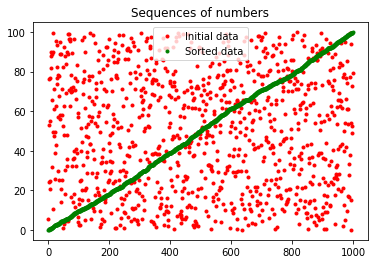

In [34]:
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,'g.',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

## Задание 2. Нахождение минимального и максимального значения

Написать пользовательские функции min(tree) и max(tree) для нахождения минимального и максимального значений бинарного дерева поиска tree. Реализовать функции с помощью рекурсии. Написать строки документирования для пользовательских функций.

### Реализация

In [35]:
test_tree

[10.0, [1.0, None, [3.0, None, [4.0, None, None]]], None]

In [36]:
def find_min(tree):
    """ нахождение минимального значения бинарного дерева поиска
    
        Arguments:
        tree -- исходное дерево
                        
        Returns: минимальное значение
    """
    if tree[1] is None: 
        return tree[0] 
    return find_min(tree[1]) 

In [37]:
min_value = find_min(tree)
min_value

6.461761568044011e-05

In [38]:
def find_max(tree):
    """ нахождение максимального значения бинарного дерева поиска
    
        Arguments:
        tree -- исходное дерево
                        
        Returns: максимальное значение
    """
    if tree[2] is None: 
        return tree[0] 
    return find_max(tree[2]) 

In [39]:
max_value = find_max(tree)
max_value

99.85723099812446